In [2]:
import numpy as np
import pandas as pd

In [8]:
print(np.__version__)

1.26.4


In [3]:
df = pd.read_csv('PS_20174392719_1491204439457_log.csv',nrows=10000)
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            10000 non-null  int64  
 1   type            10000 non-null  object 
 2   amount          10000 non-null  float64
 3   nameOrig        10000 non-null  object 
 4   oldbalanceOrg   10000 non-null  float64
 5   newbalanceOrig  10000 non-null  float64
 6   nameDest        10000 non-null  object 
 7   oldbalanceDest  10000 non-null  float64
 8   newbalanceDest  10000 non-null  float64
 9   isFraud         10000 non-null  int64  
 10  isFlaggedFraud  10000 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 859.5+ KB


In [11]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [5]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,10000.000000,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000,10000.0
mean,4.178900,1.035467e+05,8.939330e+05,9.152741e+05,9.342758e+05,1.096606e+06,0.006800,0.0
std,2.479821,2.663072e+05,2.135683e+06,2.181428e+06,2.676340e+06,3.014496e+06,0.082185,0.0
min,1.000000,2.390000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,1.000000,4.397530e+03,1.276875e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,5.000000,1.285874e+04,2.137556e+04,1.034994e+04,0.000000e+00,0.000000e+00,0.000000,0.0
75%,7.000000,1.143825e+05,1.782719e+05,1.760934e+05,2.831067e+05,2.520552e+05,0.000000,0.0
max,7.000000,1.000000e+07,1.293042e+07,1.301050e+07,1.951612e+07,1.916920e+07,1.000000,0.0


In [19]:
df["amount"].mean()

103546.689949

In [18]:
df["amount"].std()

266307.19529505004

In [6]:
df.duplicated().sum()

0

In [7]:
df['type'].value_counts()

type
PAYMENT     5465
CASH_IN     1949
CASH_OUT    1321
TRANSFER     921
DEBIT        344
Name: count, dtype: int64

<Axes: xlabel='type'>

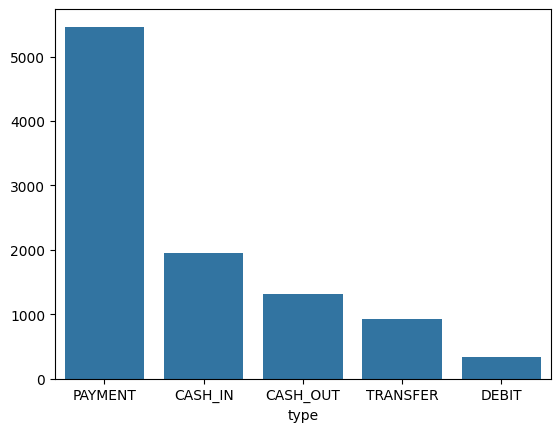

In [8]:
import seaborn as sns
type_count = df['type'].value_counts()
sns.barplot(x=type_count.index,y=type_count.values)

In [9]:
df['type'] = df['type'].map({'CASH_OUT':1,'PAYMENT':2,'CASH_IN':3,'TRANSFER':4,'DEBIT':5})

In [10]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,2,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,2,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,7,2,466.73,C517929856,881.0,414.27,M2128130537,0.0,0.0,0,0
9996,7,2,8239.66,C1483641522,11515.0,3275.34,M1108211033,0.0,0.0,0,0
9997,7,2,6063.34,C728110179,31409.0,25345.66,M277524255,0.0,0.0,0,0
9998,7,4,317806.64,C1021138110,10901.0,0.00,C1935506329,103168.0,0.0,0,0


In [11]:
df['isFraud'].value_counts()

isFraud
0    9932
1      68
Name: count, dtype: int64

In [12]:
df1 = df[['type','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']]

In [13]:
x = df1
y = df['isFraud']

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=100)
x_train.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
1191,2,1849.56,10426.00,8576.44,0.00,0.00
4458,3,106343.20,296083.83,402427.03,2096108.16,1796138.08
1131,2,4322.17,51141.00,46818.83,0.00,0.00
9562,2,26470.27,6473.06,0.00,0.00,0.00
6579,2,13268.13,82786.00,69517.87,0.00,0.00


In [16]:
%%time

from sklearn.linear_model import LinearRegression
from sklearn import metrics

regressor = LinearRegression()
regressor.fit(x_train, y_train)

y_test_pred = regressor.predict(x_test)

print("Model's MAE :", metrics.mean_absolute_error(y_test, y_test_pred))
print("Model's MSE :", metrics.mean_squared_error(y_test, y_test_pred))
print("Model's RMSE :", np.sqrt(metrics.mean_absolute_error(y_test, y_test_pred)))
print("Model's R2 score :", metrics.r2_score(y_test, y_test_pred))
print()

Model's MAE : 0.015784592797914707
Model's MSE : 0.006310968050524223
Model's RMSE : 0.1256367493925034
Model's R2 score : 0.09207767939516265

CPU times: total: 250 ms
Wall time: 353 ms


In [17]:
%%time

from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

regressor = DecisionTreeRegressor()
regressor.fit(x_train, y_train)

y_test_pred = regressor.predict(x_test)


print("Model's MAE :", metrics.mean_absolute_error(y_test, y_test_pred))
print("Model's MSE :", metrics.mean_squared_error(y_test, y_test_pred))
print("Model's RMSE :", np.sqrt(metrics.mean_absolute_error(y_test, y_test_pred)))
print("Model's R2 score :", metrics.r2_score(y_test, y_test_pred))
print()



Model's MAE : 0.004333333333333333
Model's MSE : 0.004333333333333333
Model's RMSE : 0.06582805886043833
Model's R2 score : 0.3765885004555698

CPU times: total: 172 ms
Wall time: 259 ms
